Text(0, 0.5, 'Feature 1')

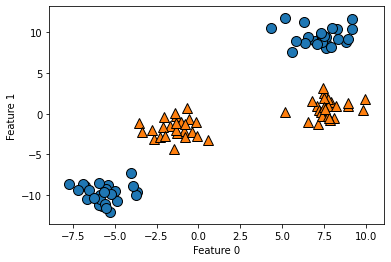

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X,y=make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

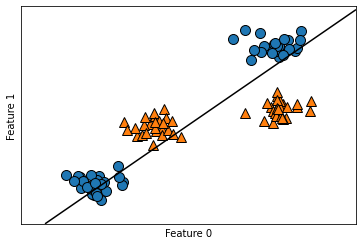

In [2]:
# 用线性支持向量机看看会弄出多垃圾的结果
from sklearn.svm import LinearSVC

linear_svm=LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0.5, 0, 'Feature 1 ** 2')

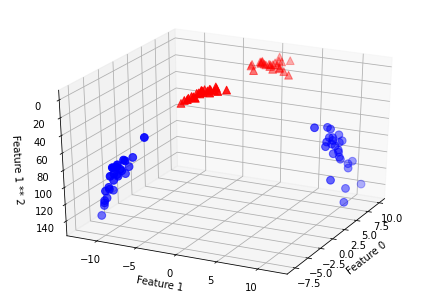

In [3]:
# 现在我们添加一个新特征叫feature1 ** 2
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()

# 3D可视化
ax=Axes3D(figure, elev=-152, azim=-26)
# 首先画出所有y==0的点，然后画出所有y==1的点
mask= y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1 ** 2')

Text(0.5, 0, 'Feature 1 ** 2')

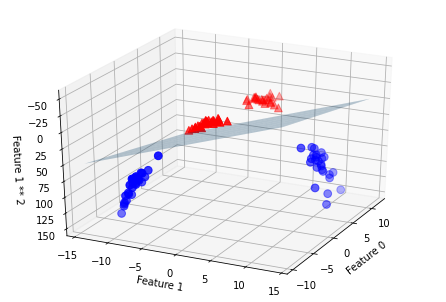

In [4]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 显示线性决策边界
figure = plt.figure()
ax=Axes3D(figure,elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1 ** 2')

Text(0, 0.5, 'Feature 1')

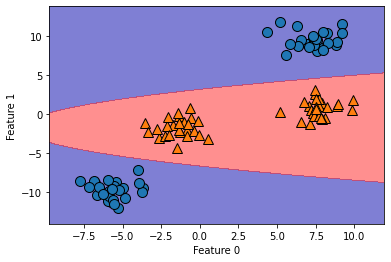

In [5]:
ZZ = YY ** 2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')